In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Анализ бронирования в отелях с применением методов Big Data
##### Сезонность:  
    Какие месяцы наиболее популярны для бронирования? 
    
##### Длительность пребывания:  
    Какова средняя продолжительность пребывания в отеле?
    Существуют ли различия в длительности пребывания в зависимости от типа номера и сезона?

##### Повторные гости:  
    Какая доля гостей является повторными?  
    Какие факторы влияют на вероятность повторного бронирования?

##### Спрос на номера:  
    Какие типы номеров наиболее популярны?  
    Существуют ли сезонные колебания спроса на разные типы номеров?
    
##### Отмены:  
    Процент отмен в зависимости от типа отеля
    Существуют ли колебания отмен бронирования в зависимости от месяца?
    Топ стран по отменам бронирований

    

In [3]:
data = pd.read_csv('hotel_booking.csv')
data

list(data.columns)


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [4]:
data.isnull().sum()

#Убираем наименее важные колонки и колонки с наибольшим количеством нуллов

data.drop(['agent','company','name','email','phone-number','credit_card'],axis=1,inplace=True)
data.dropna(inplace = True)
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])


In [5]:
df_1 = data
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
res = df_1.groupby('arrival_date_month').size()
#res.sort_values()
res
list(data.columns)


['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [6]:
res.index = ([4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9])

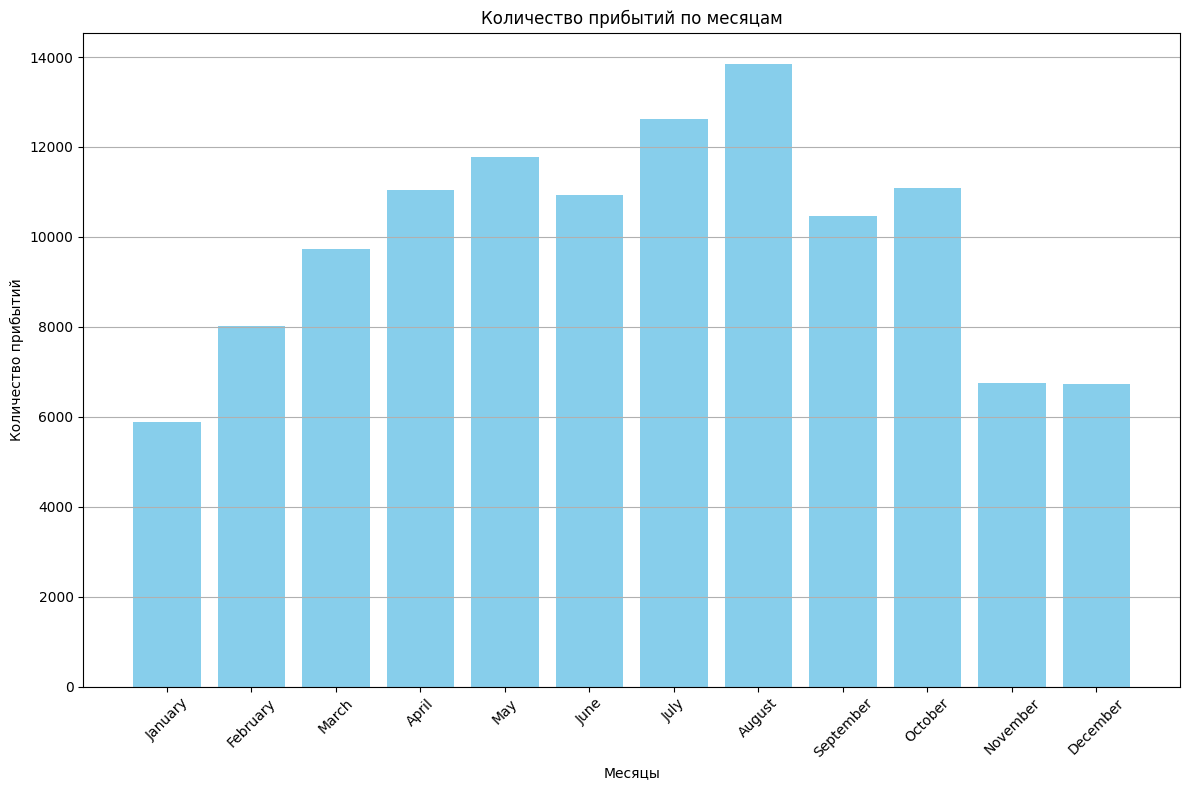

In [7]:
plt.figure(figsize=(12, 8))
plt.bar(res.index, res.values, color='skyblue')
plt.title('Количество прибытий по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Количество прибытий')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], months, rotation=45)
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

##### Можем заметить, что распределение бронирования мест походит на нормальное распреление отностельно летнего сезона. Топ 3 месяца по бронированию мест: Август, Июль и Май, которые в сумме занимают  около 32% от общего числа броней за всё время


##### Также рассмотрим аналитику по годам:

In [8]:
res1 = data.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index()
res1.columns = ['arrival_date_year', 'arrival_date_month', 'cnt']
year_data = res1[res1['arrival_date_year'] >= 2015]
months_data = year_data['arrival_date_month']
year_data

,arrival_date_year,arrival_date_month,cnt
0,2015,August,3873
1,2015,December,2900
2,2015,July,2763
3,2015,November,2320
4,2015,October,4919
5,2015,September,5084
6,2016,April,5404
7,2016,August,5054
8,2016,December,3828
9,2016,February,3857


In [9]:
months_data = year_data['arrival_date_month']



C:\Users\Portnoyml\AppData\Local\Temp\ipykernel_8492\3947269012.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(year_data.sort_index()['arrival_date_month'], rotation=45)
C:\Users\Portnoyml\AppData\Local\Temp\ipykernel_8492\3947269012.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(year_data.sort_index()['arrival_date_month'], rotation=45)
C:\Users\Portnoyml\AppData\Local\Temp\ipykernel_8492\3947269012.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(year_data.sort_index()['arrival_date_month'], rotation=45)


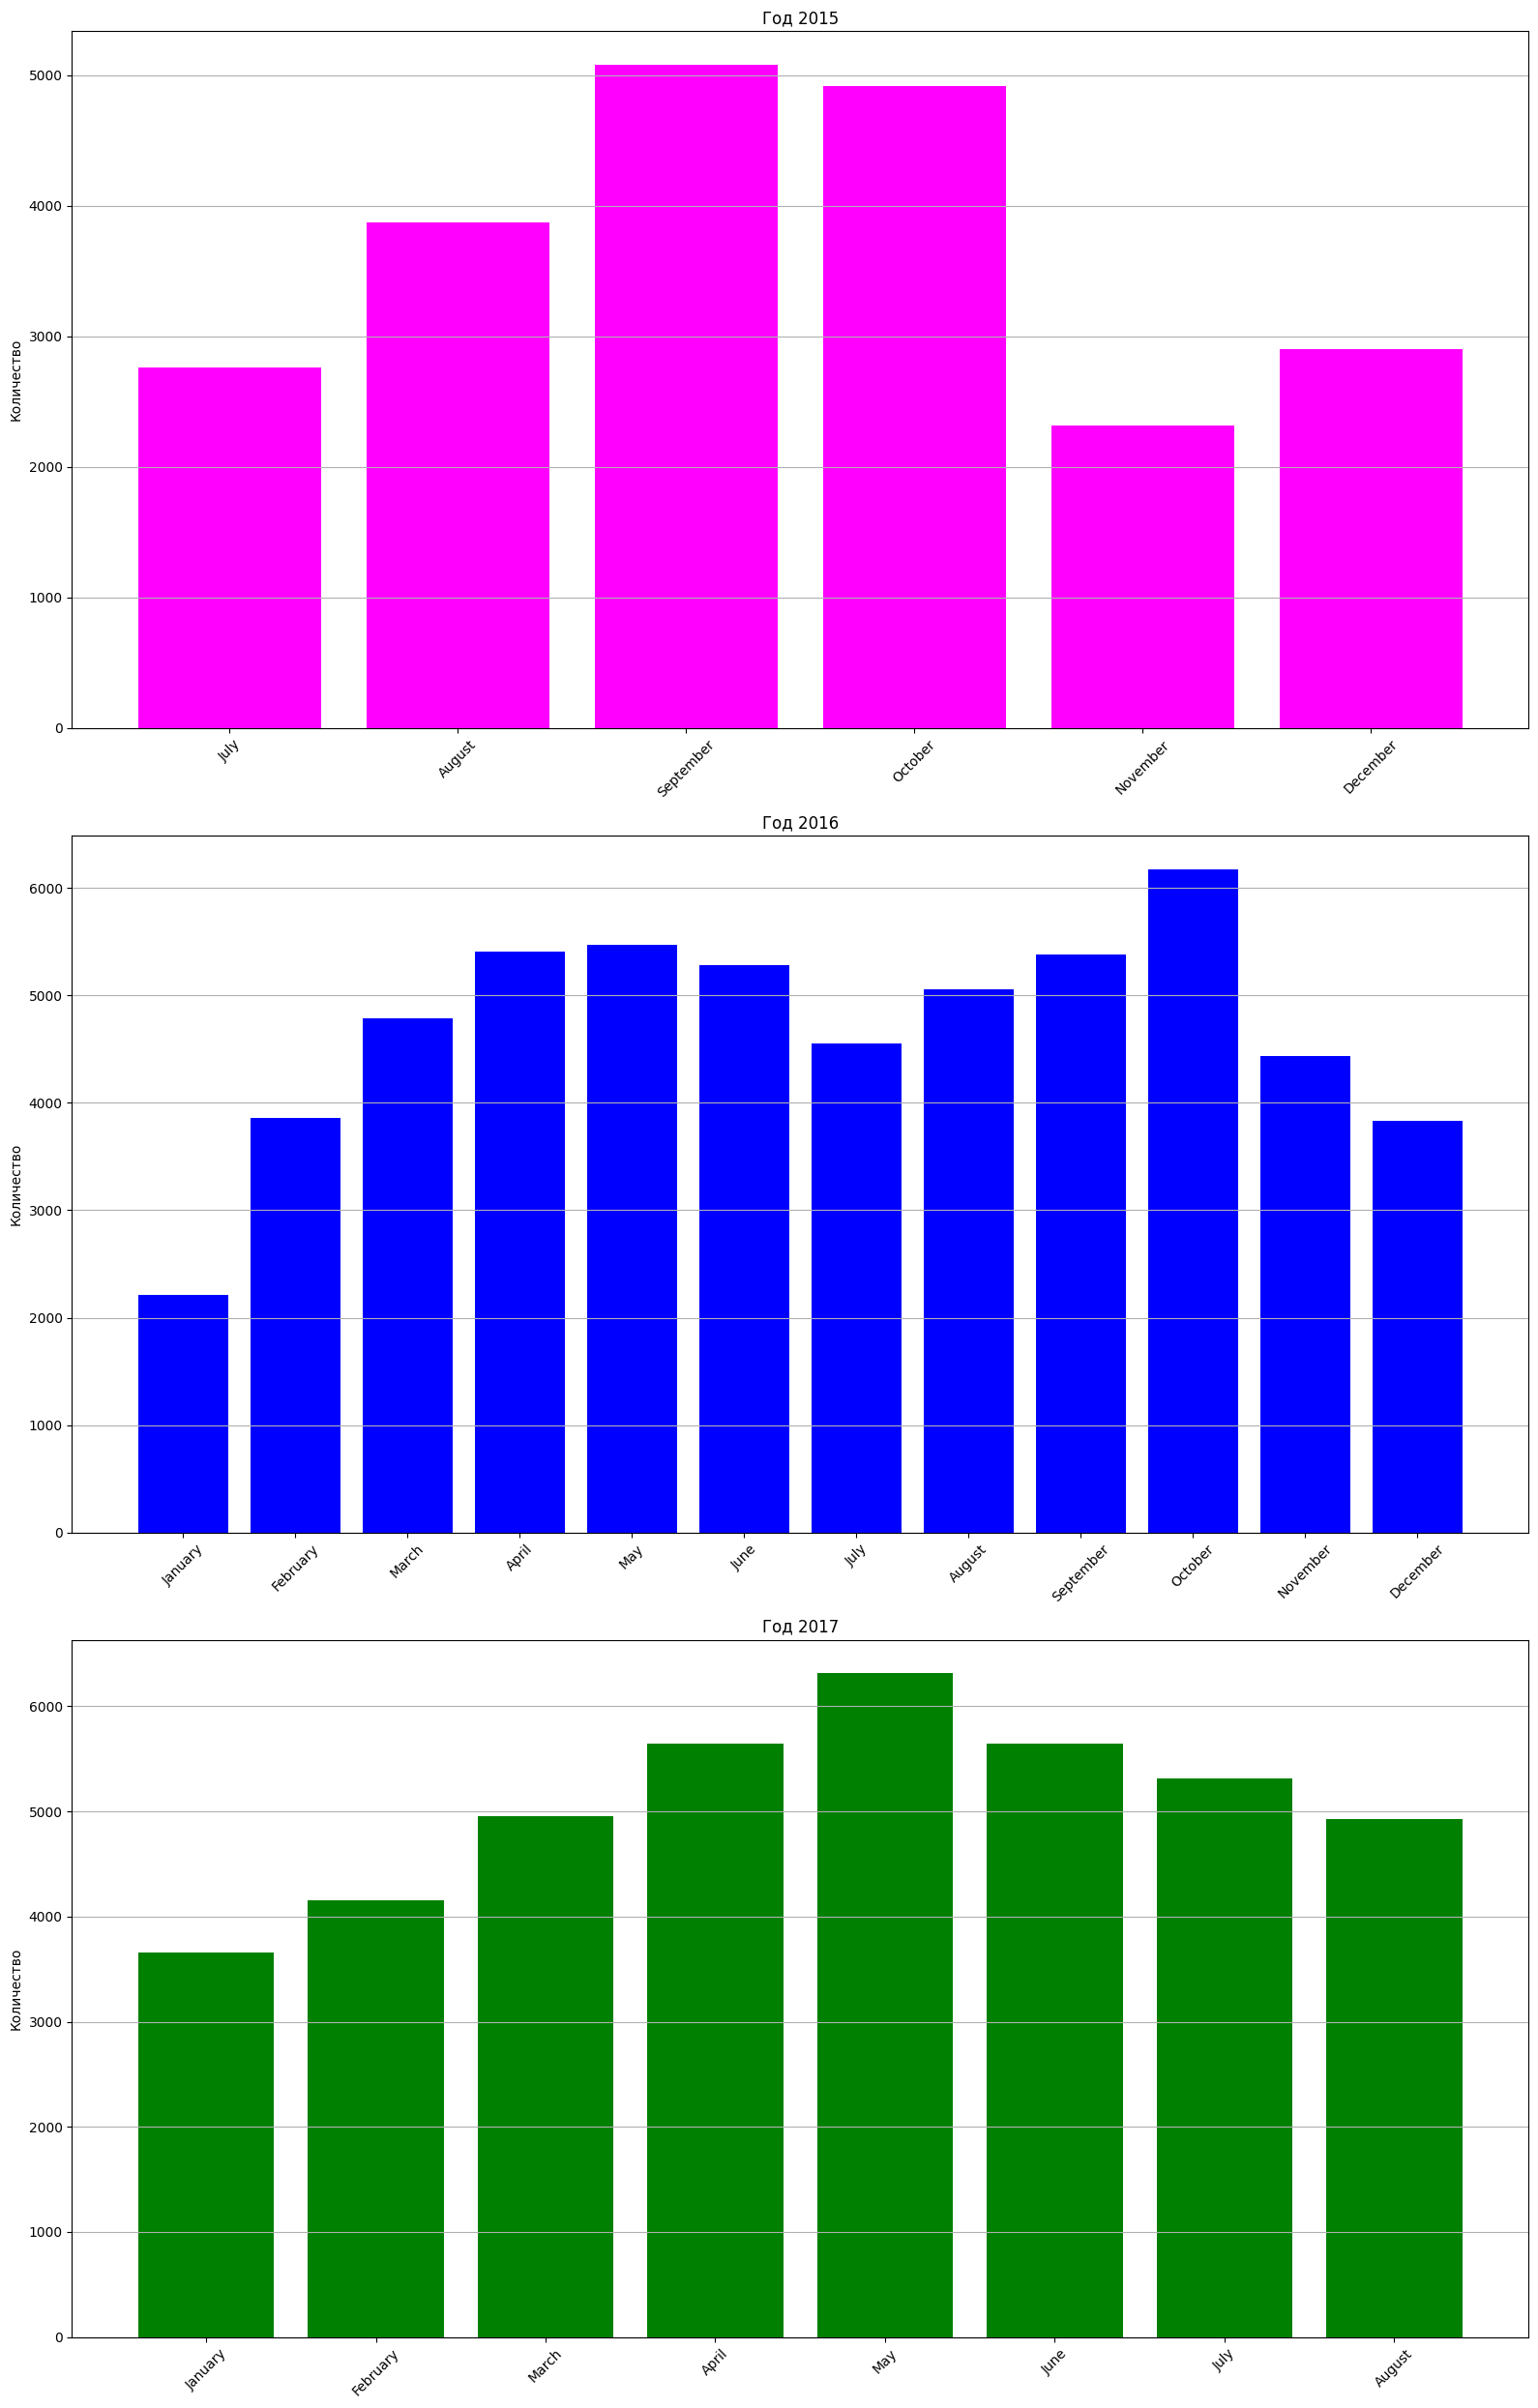

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(16, 25))
colors = ["magenta", "blue", "green"]

for i in range(3):
    curr_year = 2015 + i
    year_data = res1[res1['arrival_date_year'] == curr_year]
    months_data = year_data['arrival_date_month']

    months_data.index = [i for i in range(len(months_data))]
    a = []
    for j in range(len(months_data)):
        c = months.index(months_data[j])
        a.append(c+1)

    year_data.index = a
    axs[i].bar(year_data.sort_index()['arrival_date_month'], year_data.sort_index()['cnt'], color=colors[i])
    
    # Заголовок и метки
    axs[i].set_title(f'Год {curr_year}')
    axs[i].set_ylabel('Количество')
    
    # Установка меток по оси X
    axs[i].set_xticklabels(year_data.sort_index()['arrival_date_month'], rotation=45)
    axs[i].grid(axis='y')
    

plt.tight_layout()
plt.show()


# Средняя продолжительность пребывания в отеле

In [29]:
temp = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]


print(f'Среднее число ночей: {temp.mean()}')

Среднее число ночей: 3.431041733250349


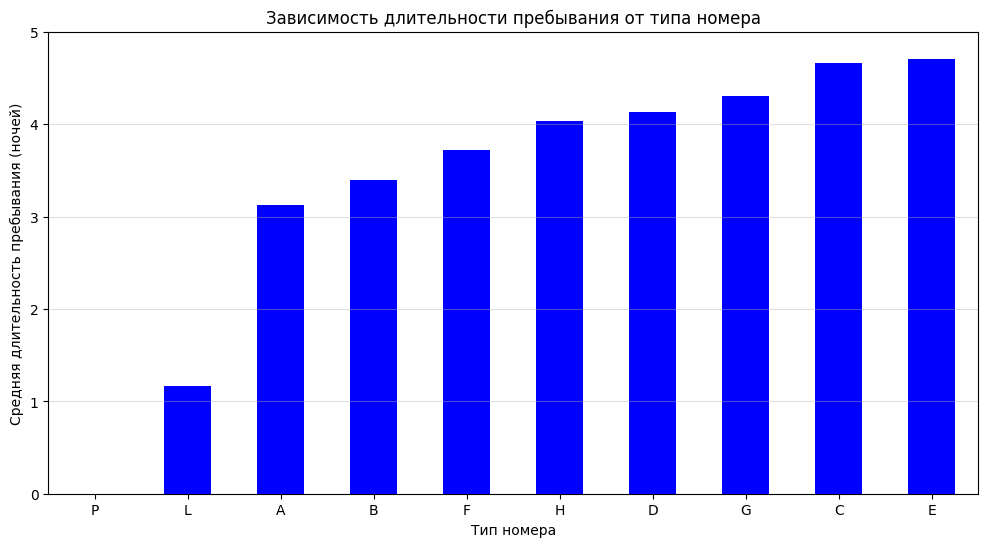

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = data

df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(12, 6))
df.groupby('reserved_room_type')['stay_duration'].mean().sort_values().plot(kind='bar', color='blue')
plt.title('Зависимость длительности пребывания от типа номера')
plt.xlabel('Тип номера')
plt.ylabel('Средняя длительность пребывания (ночей)')
plt.ylim([0, 5])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()


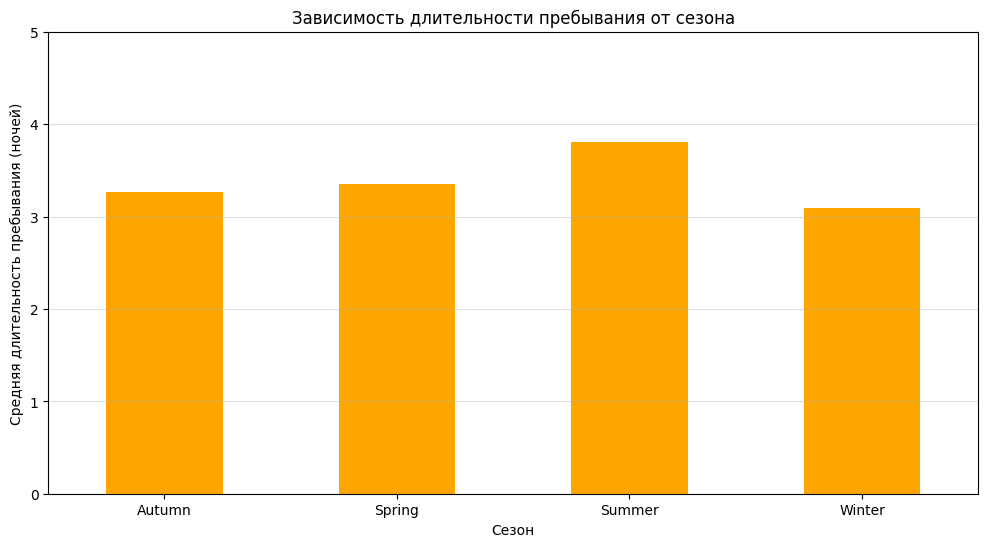

In [30]:
df = data

season_mapping = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}
df['season'] = df['arrival_date_month'].map(season_mapping)

plt.figure(figsize=(12, 6))
df.groupby('season')['stay_duration'].mean().sort_index().plot(kind='bar', color='orange')
plt.title('Зависимость длительности пребывания от сезона')
plt.xlabel('Сезон')
plt.ylabel('Средняя длительность пребывания (ночей)')
plt.ylim([0, 5])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

# Повторные гости:  

## Какая доля гостей является повторными? 

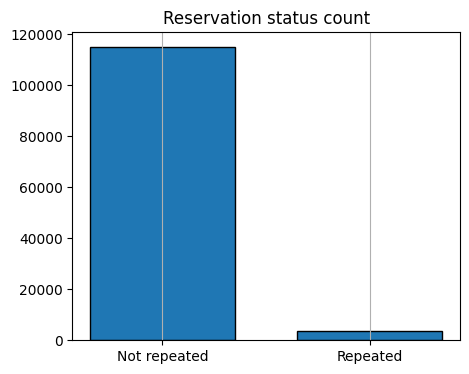

'3.31%'

In [14]:
a = data["is_repeated_guest"].value_counts()

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not repeated','Repeated'], data['is_repeated_guest'].value_counts(), edgecolor='k', width=0.7)
plt.grid(axis='x')
plt.show()

format(a[1]/a[0]*100, ".3") + "%"

### чуть больше трёх процентов гостей являются повторяющимися

## Какие факторы влияют на вероятность повторного бронирования? 

C:\Users\Portnoyml\AppData\Local\Temp\ipykernel_8492\464111110.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

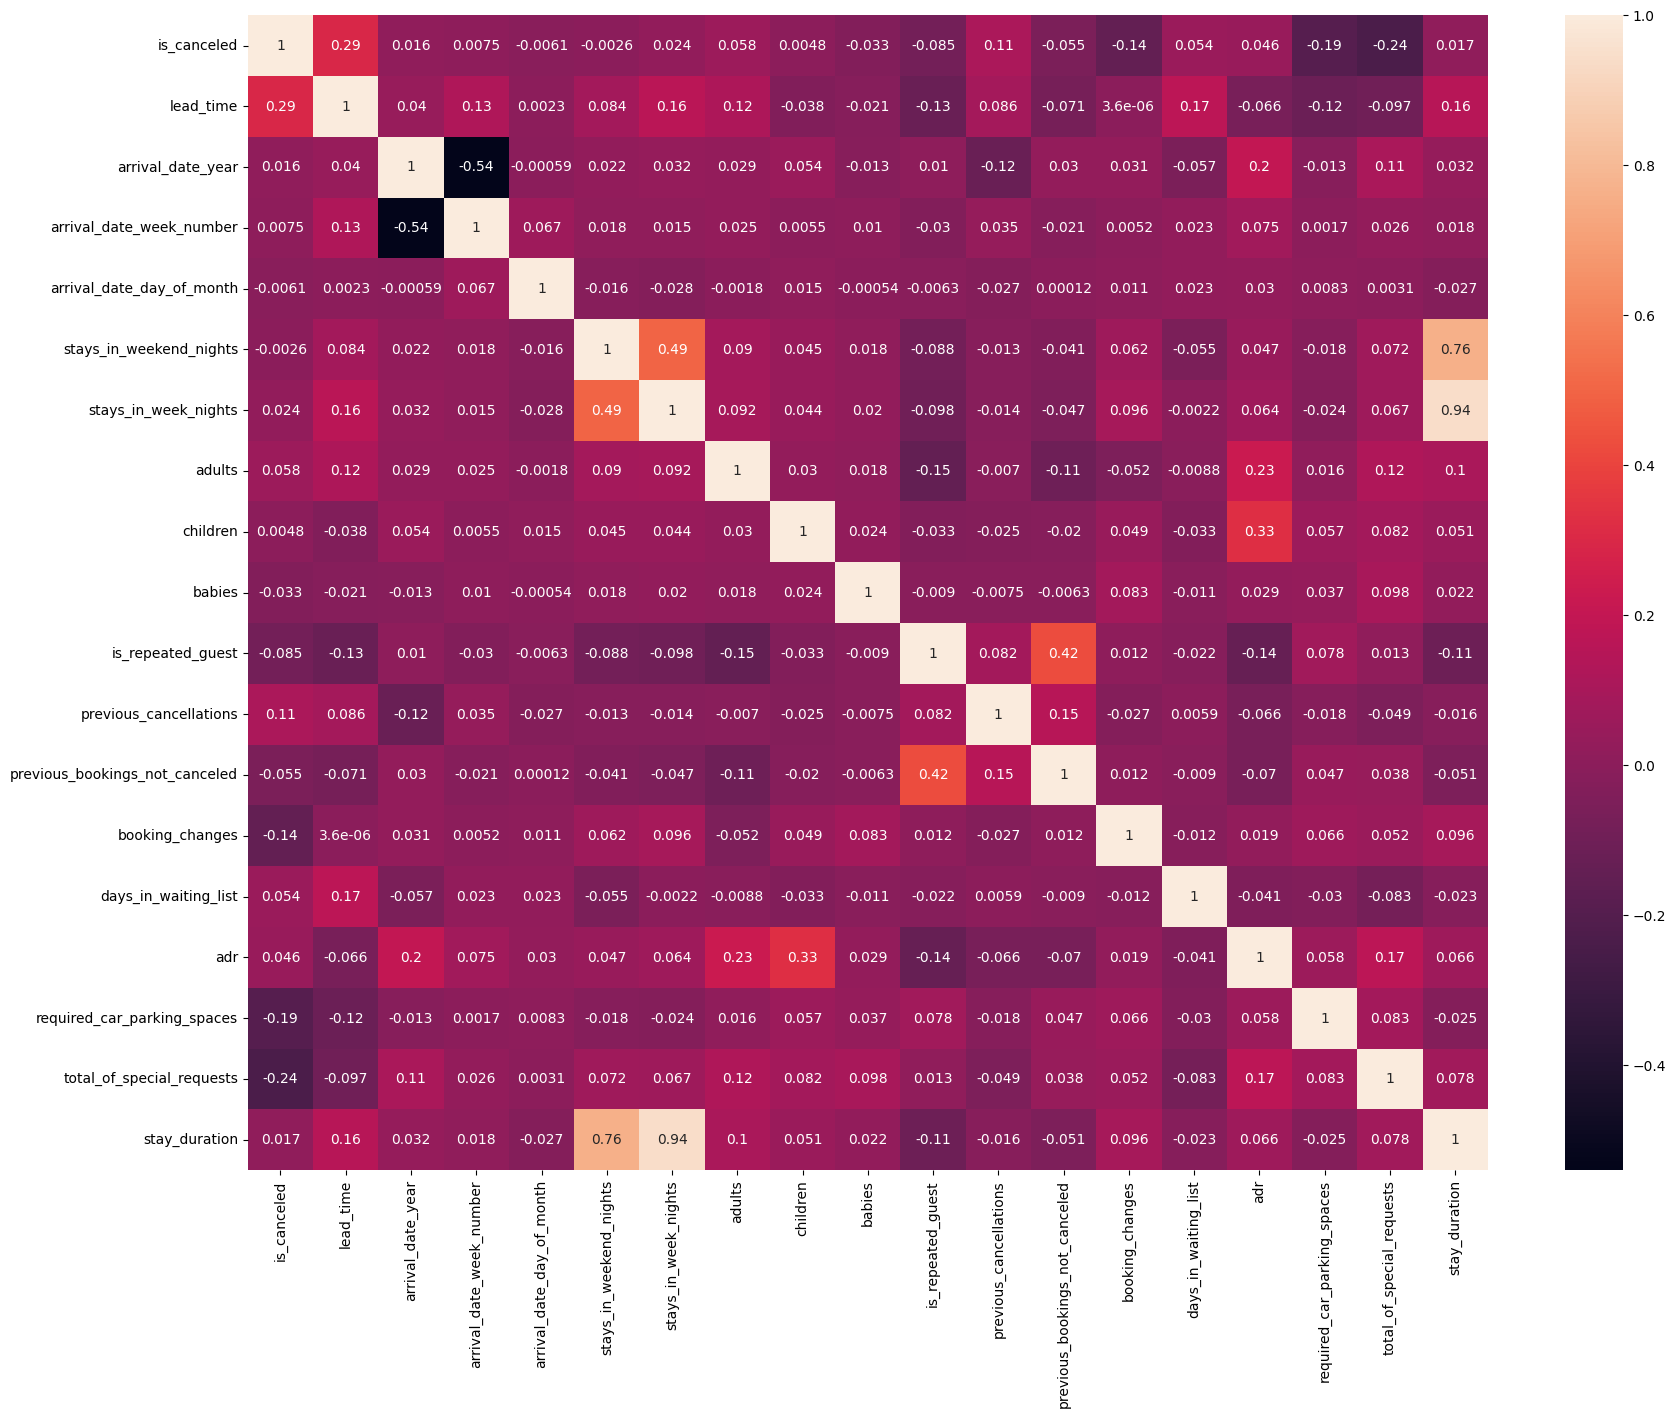

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(data.corr(), annot=True)
ax


### можем видеть, что веротяность повторного бронирования весомо зависит от того, что предыдущее бронирование не было отменено

## Спрос на номера:  


### Какие типы номеров наиболее популярны?  


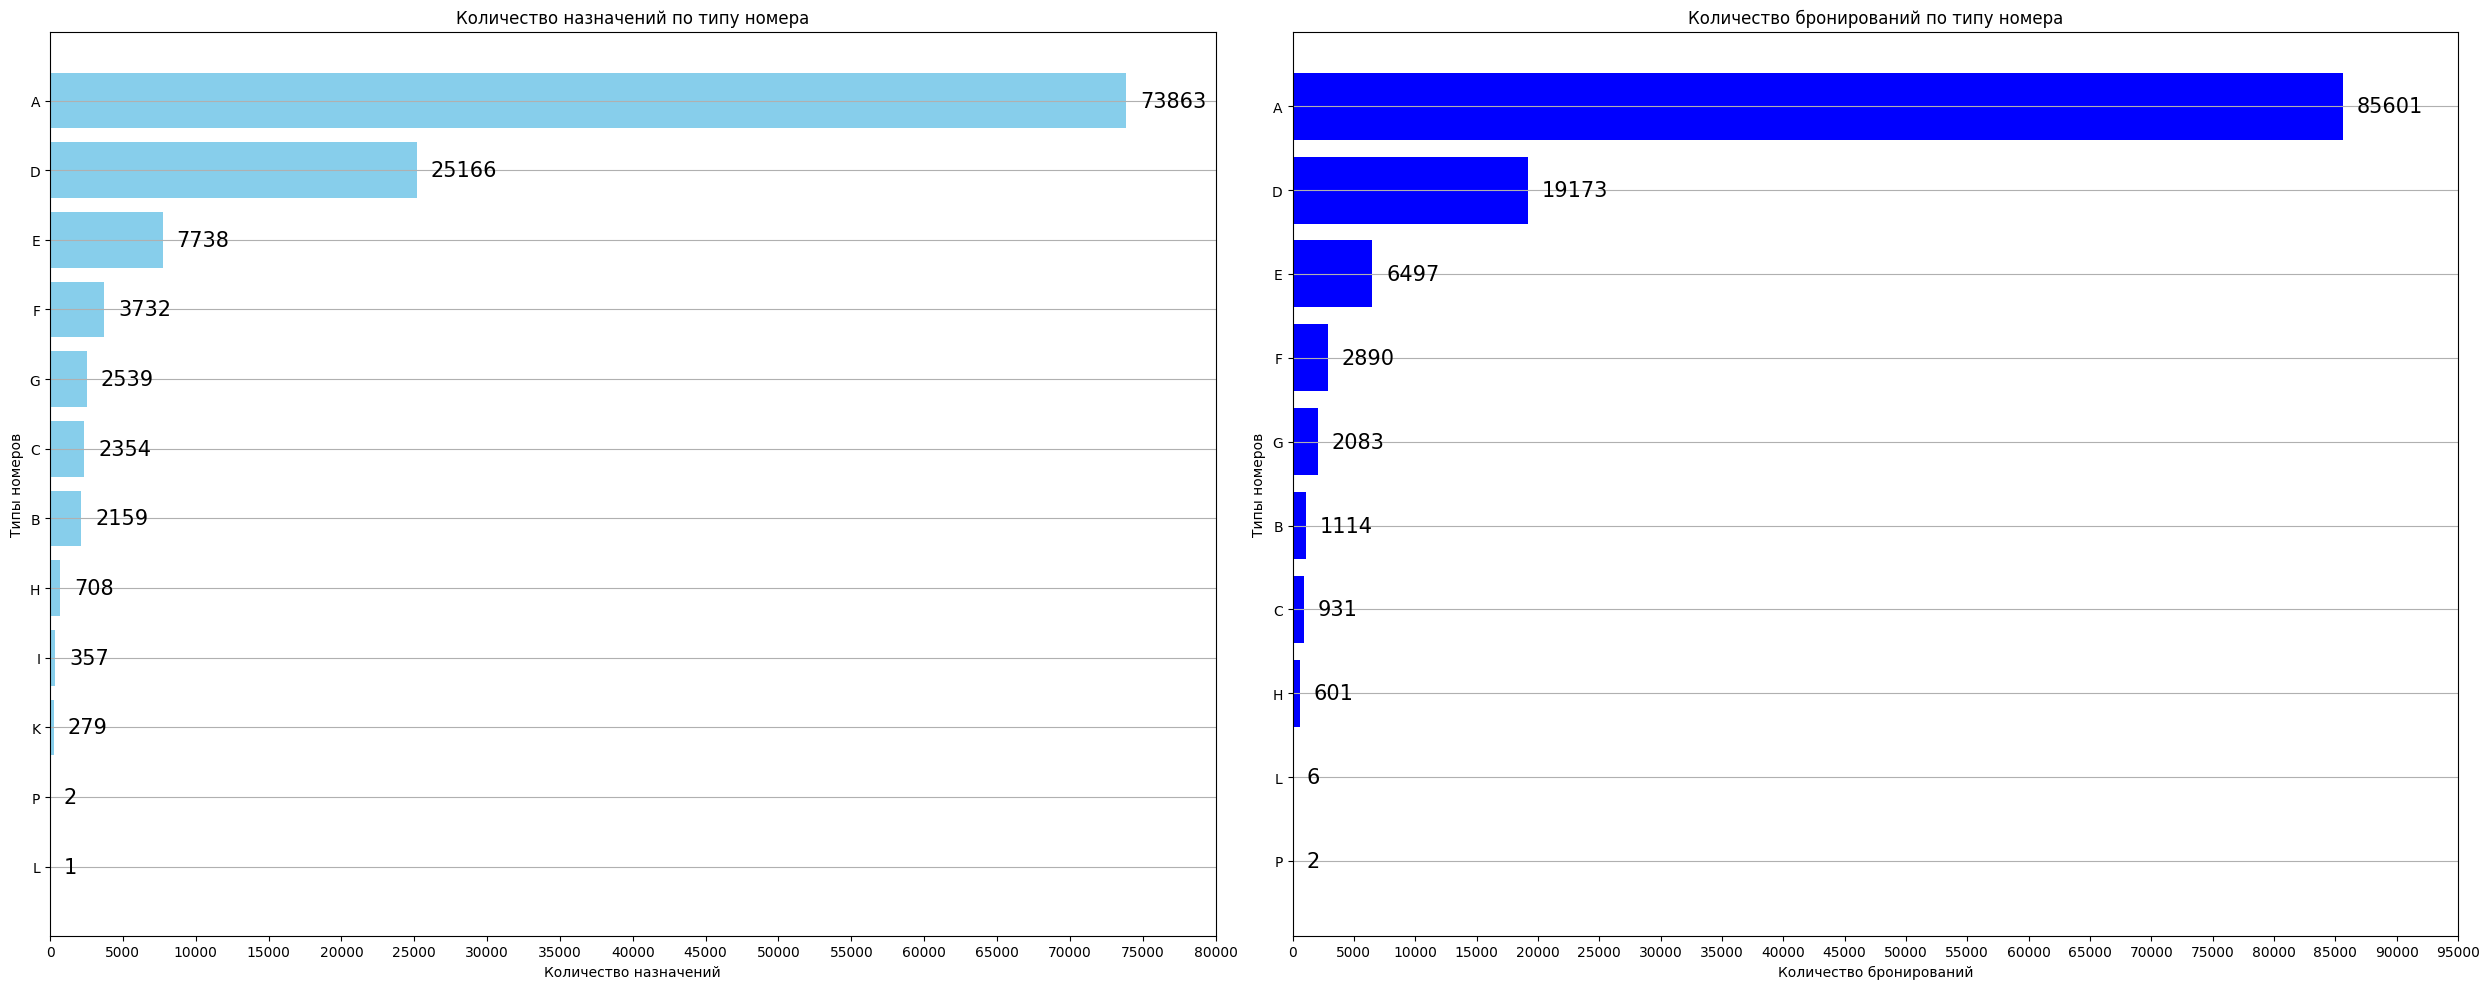

In [16]:
res3 = data.groupby("assigned_room_type").size()
res4 = data.groupby("reserved_room_type").size()

fig, axs = plt.subplots(1, 2, figsize=(25, 10))


bars = axs[0].barh(res3.sort_values().index, res3.sort_values().values, color='skyblue')
axs[0].set_title('Количество назначений по типу номера')
axs[0].set_ylabel('Типы номеров')
axs[0].set_xlabel('Количество назначений')
axs[0].bar_label(bars, fontsize=15, color='black', padding=10)
axs[0].set_xlim([0, 80000])
axs[0].set_xticks([i for i in range(0, 80001, 5000)])
axs[0].grid(axis='y')

bars = axs[1].barh(res4.sort_values().index, res4.sort_values().values, color='blue')
axs[1].set_title('Количество бронирований по типу номера')
axs[1].set_ylabel('Типы номеров')
axs[1].set_xlabel('Количество бронирований')
axs[1].bar_label(bars, fontsize=15, color='black', padding=10)
axs[1].set_xlim([0, 95000])
axs[1].set_xticks([i for i in range(0, 95001, 5000)])
axs[1].grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()


### Существуют ли сезонные колебания спроса на разные типы номеров?

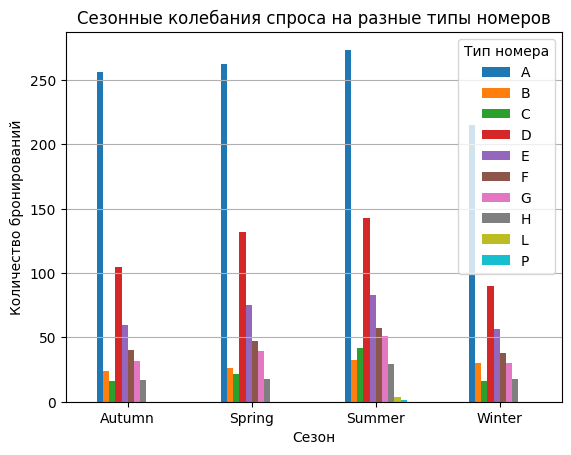

In [17]:
res5 = data.groupby(['arrival_date_month', 'reserved_room_type']).size().reset_index()
res5.columns = ['arrival_date_month', 'reserved_room_type', 'cnt']
#res5 = res5.pivot_table(index="arrival_date_month", columns='reserved_room_type', values="cnt", aggfunc='sum')
season_mapping = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

res5["season"] = res5["arrival_date_month"].map(season_mapping)
res5['cnt'] = res5['cnt']**0.5

grouped = res5.groupby(['season', 'reserved_room_type'])['cnt'].sum().unstack()

# Построим график
grouped.plot(kind='bar')
plt.title('Сезонные колебания спроса на разные типы номеров')
plt.xlabel('Сезон')
plt.ylabel('Количество бронирований')
plt.xticks(rotation=0)
plt.legend(title='Тип номера')
plt.grid(axis='y')
plt.show()

## Отмены:  


### Процент отмен в зависимости от типа отеля


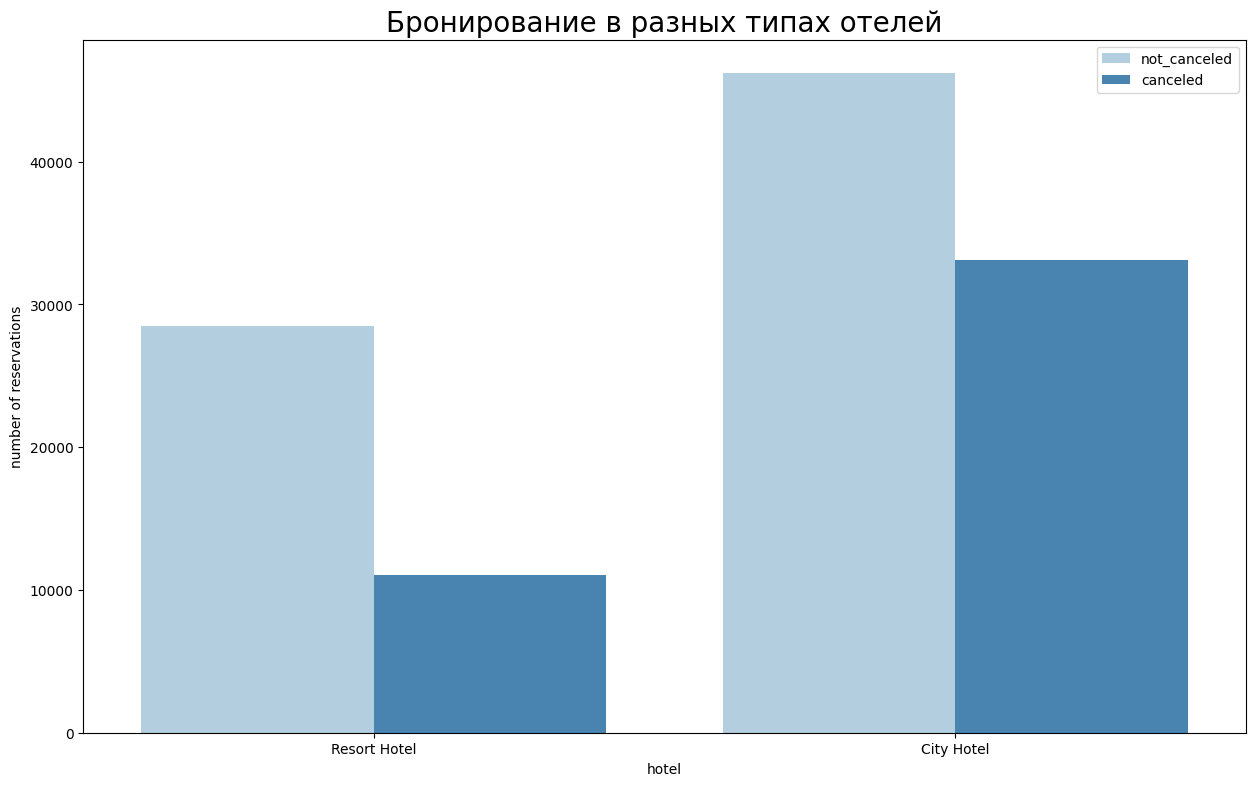

In [18]:
plt.figure(figsize = (15,9))
ax = sns.countplot(x = 'hotel', hue = 'is_canceled',data=data, palette= 'Blues')
legend_labels,_ = ax. get_legend_handles_labels()
plt.title('Бронирование в разных типах отелей', size=20)
plt.ylabel('number of reservations')
plt.legend(['not_canceled','canceled'])
plt.show()


### Существуют ли колебания отмен бронирования в зависимости от месяца?


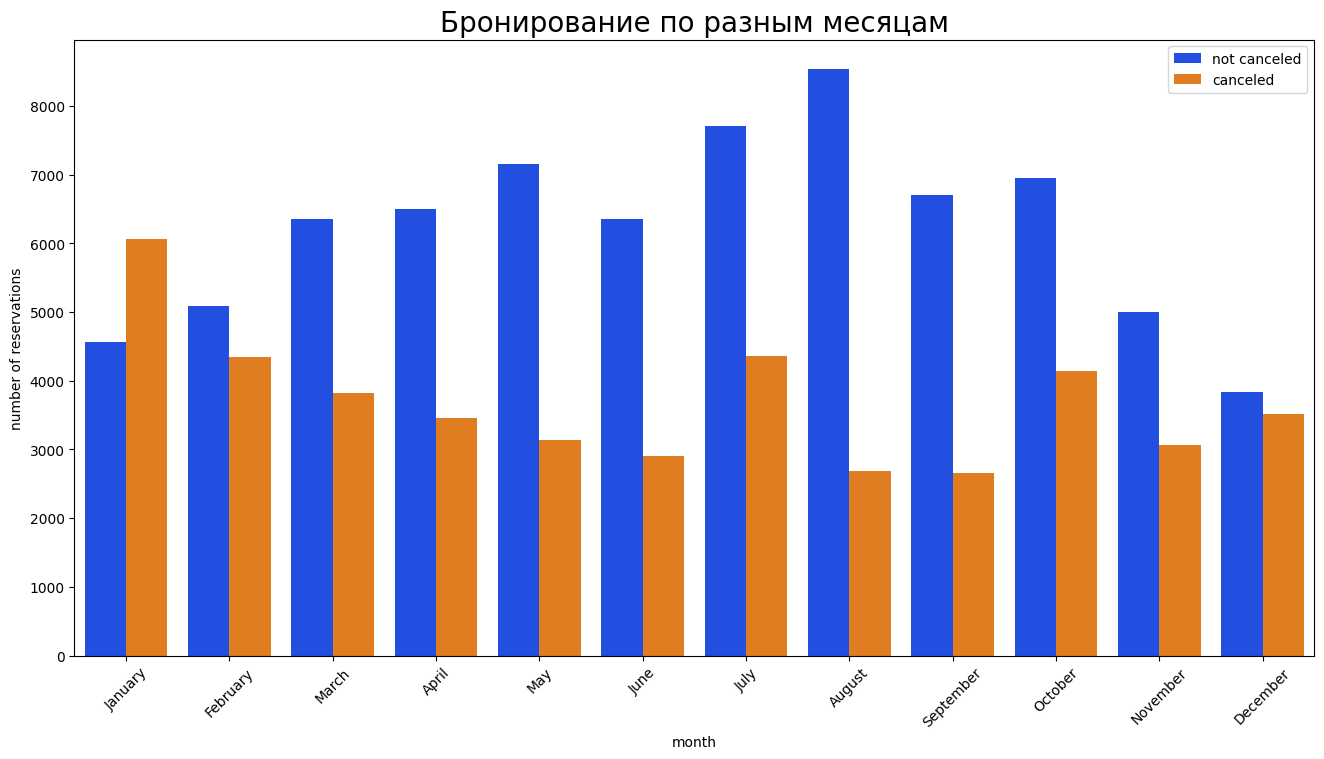

In [19]:
res6 = data
res6['month'] = res6['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax = sns.countplot(x='month',hue='is_canceled',data=res6,palette='bright')
legend_labels,_ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor = (1,1))
plt.title('Бронирование по разным месяцам',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], months, rotation=45)
plt.show()


### Топ стран по отменам бронирований


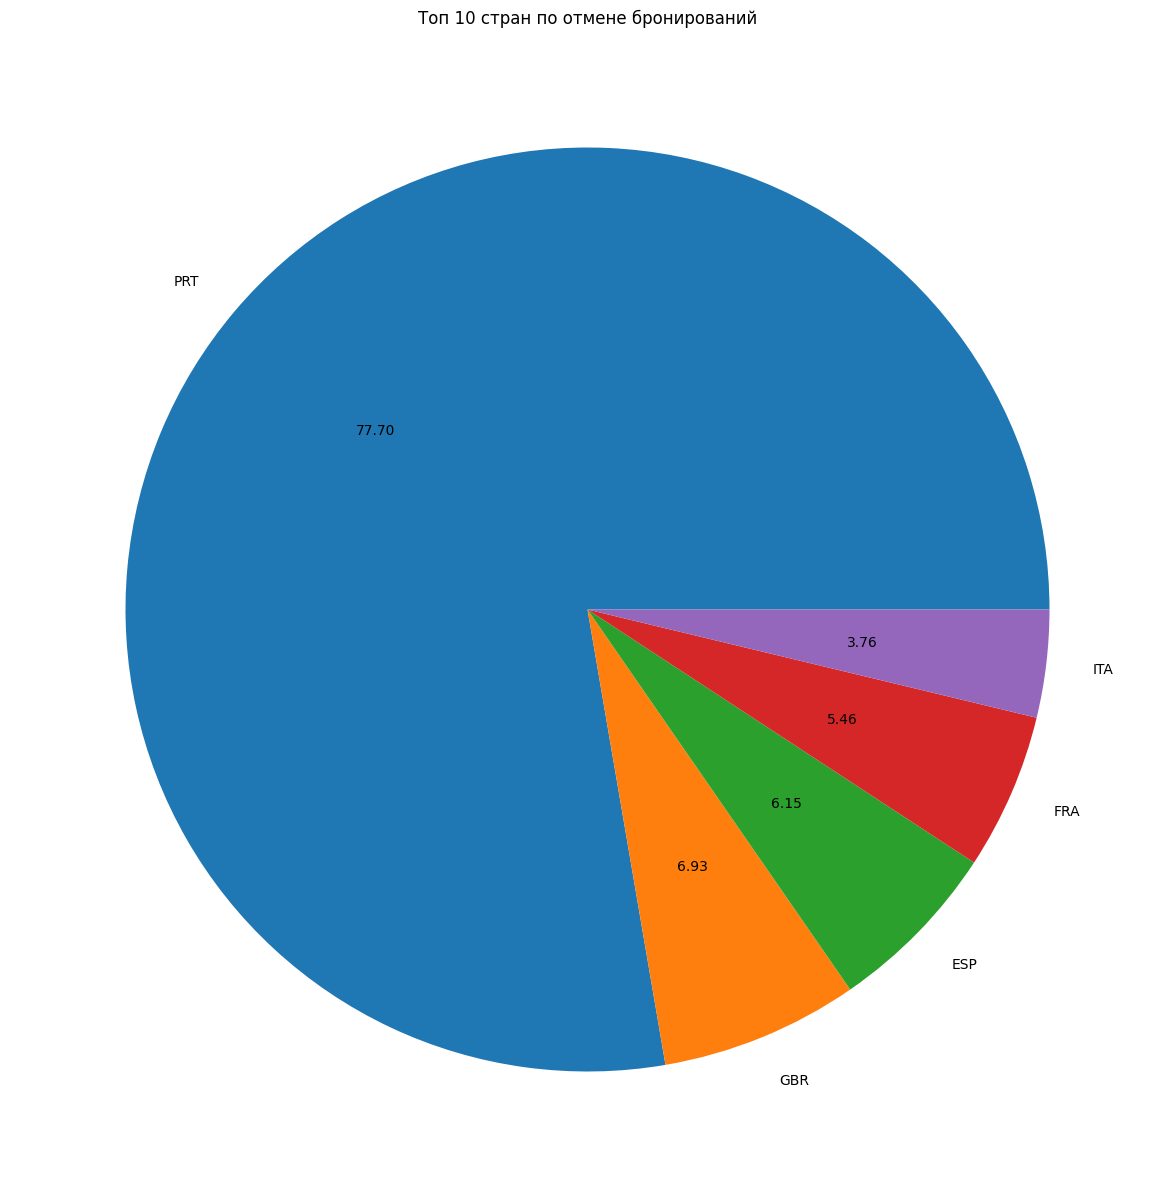

In [20]:
cancelled_data = data[data['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:5]
plt.figure(figsize=(15,15))
plt.title('Топ 10 стран по отмене бронирований')
plt.pie(top_10_country, autopct='%.2f',labels = top_10_country.index)
plt.show()